In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2e027119b9e4408d9035f56d4aaaa5a6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='On5ObKLn-GX-wbO0zaUCzdQ86PLr8yYwqy5XUo3CPCAD',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

body = client_2e027119b9e4408d9035f56d4aaaa5a6.get_object(Bucket='internshiptask-donotdelete-pr-1enmgcz4fdzoho',Key='Fraud.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
data.shape

(6362620, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [14]:
data.isnull().sum()   #to check null, no null value

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
data.duplicated(keep = "first").sum() #to check duplicates, no duplicate value

0

In [15]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [16]:
data.replace({'type':{'CASH_OUT':0,'CASH_IN':1, 'PAYMENT':2, 'TRANSFER':3, 'DEBIT':4}}, inplace = True)  #converting to numerical values

In [17]:
data['type'].value_counts()

0    2237500
2    2151495
1    1399284
3     532909
4      41432
Name: type, dtype: int64

In [18]:
data['isFlaggedFraud'].value_counts() 

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [19]:
data['isFraud'].value_counts() #highly unbalanced data 

0    6354407
1       8213
Name: isFraud, dtype: int64

In [20]:
#spilitting to legit and fraud transaction
legit = data[data.isFraud == 0]
fraud = data[data.isFraud == 1]

In [21]:
print(legit.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [22]:
#compare values for normal and fraululent classes, compare value for mean
data.groupby('isFraud').mean()            #wide diff b/w mean this id imp thats how ML predicts 

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,
0,243.235663,1.173113,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.496530,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [23]:
#Under Sampling
#build sample dataset from original dataset containing similar distributuion of legit and fraudulent transactoion
#no of fraudulent transaction ---> 8213
#goal is to make eqaul distribution so we will take 8213 data from legit data to sample data

legit_sample = legit.sample(n = 8213) #it will take 8213 data point randomly from legit, good way to take data into sample

In [24]:
concateneted_data = pd.concat([legit_sample, fraud], axis = 0)  # axis = 0 adding row wise concatenation. 
                                                                # axis = 1 add column wise dont want that

In [25]:
final_data = concateneted_data.drop(columns = ['nameOrig', 'nameDest']) #dropping these two columns as it is not contributing to predict target

In [26]:
final_data.shape

(16426, 9)

In [27]:
final_data['isFraud'].value_counts()  #equal sample distribution 

0    8213
1    8213
Name: isFraud, dtype: int64

In [28]:
final_data.groupby('isFraud').mean()  #imp to check whether sample is good or not, the nature of dataset has not 
#changed, and diff is still there as earlier so now we can put this sample to train adnd Ml will give good result 

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,
0,245.753440,1.164008,1.819225e+05,8.742767e+05,899490.496759,1.122066e+06,1.244876e+06,0.000000
1,368.413856,1.496530,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [29]:
X = final_data.iloc[:, 1:-2].values   #feature matrix
y = final_data.iloc[:, -2].values    #output

In [30]:
print(X)

[[1.00000000e+00 2.33696120e+05 3.06830000e+04 2.64379120e+05
  5.00433100e+05 2.66736970e+05]
 [2.00000000e+00 8.61820000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00000000e+00 4.26641000e+03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 6.31140928e+06 6.31140928e+06 0.00000000e+00
  6.84888400e+04 6.37989811e+06]
 [3.00000000e+00 8.50002520e+05 8.50002520e+05 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.50002520e+05 8.50002520e+05 0.00000000e+00
  6.51009911e+06 7.36010163e+06]]


In [31]:
print(y)

[0 0 0 ... 1 1 1]


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 2)  

In [34]:
print(X.shape, X_train.shape, X_test.shape) 

(16426, 6) (11498, 6) (4928, 6)


In [35]:
#training Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [36]:
#accuracy score
#accuracy on training data
from sklearn.metrics import accuracy_score     
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train) #X_train_prediction = h(x), y_train = y, 
                                                                     # accuracy = h(x) - y

In [37]:
print('accuracy on training data: ', training_data_accuracy)


accuracy on training data:  0.8212732649156375


In [38]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,roc_auc_score,f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc=accuracy_score(y_test, y_pred)
pre=precision_score(y_test, y_pred)
rec=recall_score(y_test, y_pred)
print('precision score is: ', pre)
print('recall_score: ', rec)
print('accuracy',acc)
#y_pred = h(x), y_test = y, accuracy = h(x) - y

[[1637  827]
 [  70 2394]]
precision score is:  0.7432474386836386
recall_score:  0.9715909090909091
accuracy 0.8179788961038961


In [46]:
#training SVC model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# print best parameter after tuning
# fitting the model for grid search
grid.fit(X_train, y_train)

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(C=grid['C'],gamma=grid['gamma'],kernel=grid['kernel'],class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   9.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=  10.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=  10.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=  10.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=  10.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=  10.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   7.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   3.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   3.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   3.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.504 total time=   6.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.504 total time=  22.8s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.505 total time=  21.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.507 total time=  20.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.505 total time=  22.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.510 total time=  13.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.508 total time=  19.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.508 total time=  15.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.512 total time=  11.9s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.510 total time=  14.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.533 total time=  21.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.533 total time=  20.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.534 total time=  20.7s
[CV 4/5] END ....C=1000, gam

TypeError: 'GridSearchCV' object is not subscriptable

In [47]:
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [48]:
gr=grid.best_params_

In [49]:
svc_model = SVC(C=gr['C'],gamma=gr['gamma'],kernel=gr['kernel'],class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', gamma=0.0001, probability=True)

In [50]:
SVC(C=10, class_weight='balanced', gamma=0.0001, probability=True)

SVC(C=10, class_weight='balanced', gamma=0.0001, probability=True)

In [51]:
svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.5655438311688312
Accuracy score: 0.5655438311688312
F1 score: 0.6968710179810279


In [52]:
pre=precision_score(y_test, y_pred)
rec=recall_score(y_test, y_pred)
print('precision score is: ', pre)
print('recall_score: ', rec)

precision score is:  0.7432474386836386
recall_score:  0.9715909090909091


In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1637,  827],
       [  70, 2394]])

In [54]:
pd.DataFrame(y_test).value_counts()

0    2464
1    2464
dtype: int64

In [55]:
# Training decision tree model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,roc_auc_score,f1_score
tree_predict = clf.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, tree_predict))
print('Accuracy score:',accuracy_score(y_test, tree_predict))
print('F1 score:',f1_score(y_test, tree_predict))

ROCAUC score: 0.9931006493506493
Accuracy score: 0.9931006493506493
F1 score: 0.9931146213041717


In [57]:
y_pred = clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [58]:
pre=precision_score(y_test, y_pred)
rec=recall_score(y_test, y_pred)
print('precision score is: ', pre)
print('recall_score: ', rec)

precision score is:  0.9911075181891673
recall_score:  0.9951298701298701


In [59]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2442,   22],
       [  12, 2452]])

<AxesSubplot:xlabel='newbalanceDest', ylabel='isFraud'>

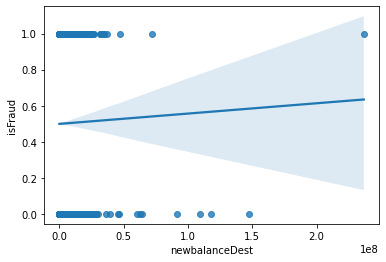

In [71]:
#checking correlation
sns.regplot(x = "newbalanceDest", y = "isFraud", data = final_data)

In [63]:
from scipy import stats
pearson_coeff, p_value = stats.pearsonr(final_data["newbalanceDest"], final_data["isFraud"])
print('pearson_coeff is: ', pearson_coeff)
print('p value is : ', p_value)

pearson_coeff is:  0.004462174446456621
p value is :  0.5674241009418193


<AxesSubplot:xlabel='newbalanceOrig', ylabel='isFraud'>

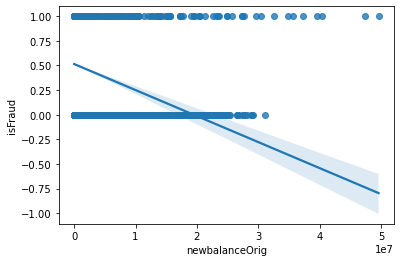

In [64]:
#checking correlation
sns.regplot(x = "newbalanceOrig", y = "isFraud", data = final_data)

In [65]:
pearson_coeff, p_value = stats.pearsonr(final_data["newbalanceOrig"], final_data["isFraud"])
print('pearson_coeff is: ', pearson_coeff)
print('p value is : ', p_value)

pearson_coeff is:  -0.13672704926665885
p value is :  2.2599640872403633e-69


<AxesSubplot:xlabel='oldbalanceOrg', ylabel='isFraud'>

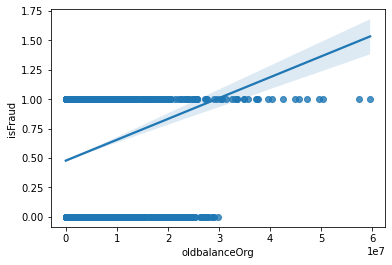

In [66]:
#checking correlation
sns.regplot(x = "oldbalanceOrg", y = "isFraud", data = final_data)

In [67]:
pearson_coeff, p_value = stats.pearsonr(final_data["oldbalanceOrg"], final_data["isFraud"])
print('pearson_coeff is: ', pearson_coeff)
print('p value is : ', p_value)

pearson_coeff is:  0.11714114826367836
p value is :  2.7929078291194024e-51


<AxesSubplot:xlabel='oldbalanceDest', ylabel='isFraud'>

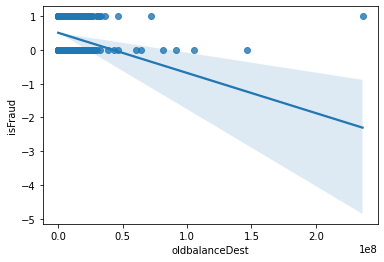

In [68]:
#checking correlation
sns.regplot(x = "oldbalanceDest", y = "isFraud", data = final_data)

In [69]:
pearson_coeff, p_value = stats.pearsonr(final_data["oldbalanceDest"], final_data["isFraud"])
print('pearson_coeff is: ', pearson_coeff)
print('p value is : ', p_value)

pearson_coeff is:  -0.08292408268541882
p value is :  1.8318144870285326e-26


<AxesSubplot:xlabel='type', ylabel='isFraud'>

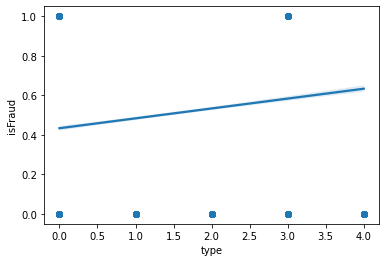

In [72]:
#checking correlation
sns.regplot(x = "type", y = "isFraud", data = final_data)

In [73]:
pearson_coeff, p_value = stats.pearsonr(final_data["type"], final_data["isFraud"])
print('pearson_coeff is: ', pearson_coeff)
print('p value is : ', p_value)

pearson_coeff is:  0.1288966453700423
p value is :  8.52729178496881e-62


<AxesSubplot:xlabel='type', ylabel='count'>

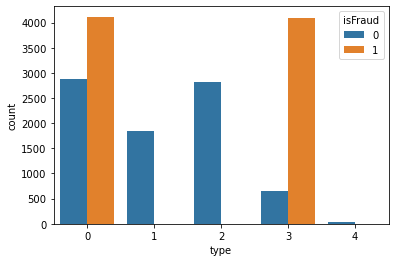

In [81]:
sns.countplot(x = 'type' , hue = 'isFraud', data = final_data) 

In [ ]:
#checking correlation
sns.regplot(x = "amount", y = "isFraud", data = final_data)

In [ ]:
pearson_coeff, p_value = stats.pearsonr(final_data["amount"], final_data["isFraud"])
print('pearson_coeff is: ', pearson_coeff)
print('p value is : ', p_value)